Found 2040 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


C:\Users\bonde\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\bonde\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 500ms/step - accuracy: 0.8489 - loss: 0.5292 - val_accuracy: 0.6250 - val_loss: 1.0172
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 541ms/step - accuracy: 0.9016 - loss: 0.2602 - val_accuracy: 0.8750 - val_loss: 0.2818
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 38s 534ms/step - accuracy: 0.9058 - loss: 0.2410 - val_accuracy: 0.6875 - val_loss: 0.9879
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 564ms/step - accuracy: 0.9181 - loss: 0.2185 - val_accuracy: 0.8125 - val_loss: 0.5587
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 525ms/step - accuracy: 0.9244 - loss: 0.1668 - val_accuracy: 0.6875 - val_loss: 0.5022
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 527ms/step - accuracy: 0.9353 - loss: 0.1627 - val_accuracy: 0.6250 - val_loss: 0.8705
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 39s 552ms/step - accuracy: 0.9293 - loss: 0.1693 - val_accuracy: 0.9375 - val_loss: 0.2659
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 39s 564ms/step - accuracy: 0.9346 - loss: 0.1645 - val_accuracy: 0.875

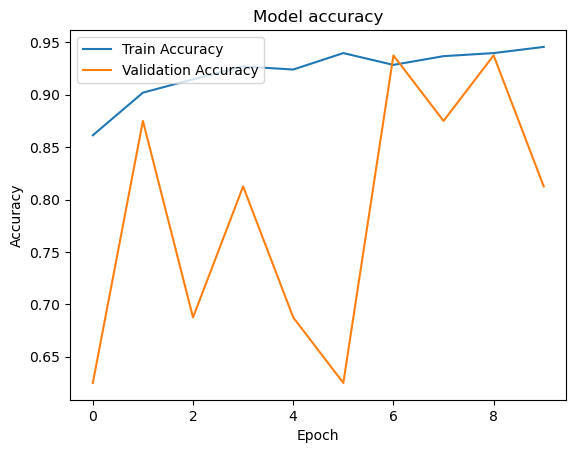

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


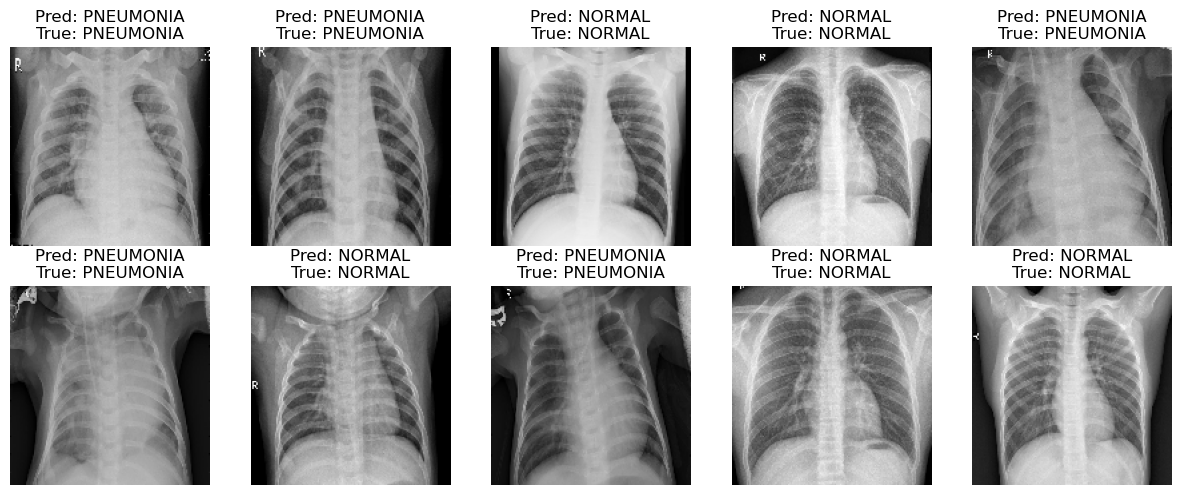

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Paths to the directories
train_dir = 'train'
val_dir = 'val'
test_dir ='test'

# 1. Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Loading images from 'train' directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary'  # Binary classification (pneumonia vs normal)
)

# Loading images from 'val' directory
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Loading images from 'test' directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# 2. Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (pneumonia vs normal)
])

# 3. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Train the model with validation
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator  # Use the validation set for evaluation during training
)

# 5. Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.3f}")

# 6. Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Make predictions on the test data
predictions = model.predict(test_generator)

# Get the class labels for binary classification (NORMAL = 0, PNEUMONIA = 1)
class_labels = list(test_generator.class_indices.keys())

# Function to plot images with their predictions
def show_predictions(generator, num_images=10):
    plt.figure(figsize=(15, 15))

    for i in range(num_images):
        # Get a batch of test images and labels
        img_batch, label_batch = next(generator)  # Use next() to get images and labels
        img = img_batch[0]  # Get the first image in the batch
        label = label_batch[0]  # Get the first label in the batch

        # Predict on the single image
        prediction = model.predict(np.expand_dims(img, axis=0))  # Make prediction
        predicted_class = (prediction > 0.5).astype("int32")[0][0]

        # Plot the image and show prediction
        plt.subplot(5, 5, i + 1)
        plt.imshow(img)
        plt.title(f'Pred: {class_labels[predicted_class]}\nTrue: {class_labels[int(label)]}')
        plt.axis('off')

    plt.show()

# Show 10 predictions
show_predictions(test_generator, num_images=10)

